In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [5]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [6]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [7]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [8]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:  
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [9]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [10]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

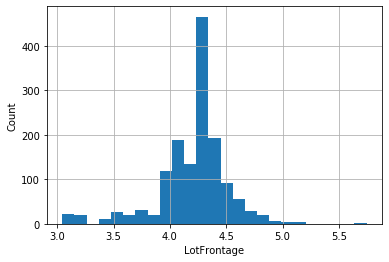

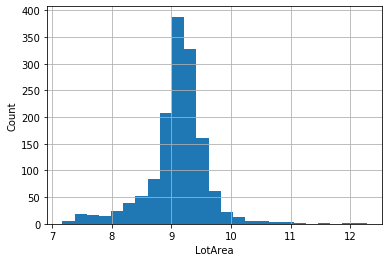

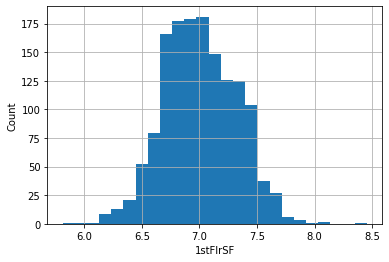

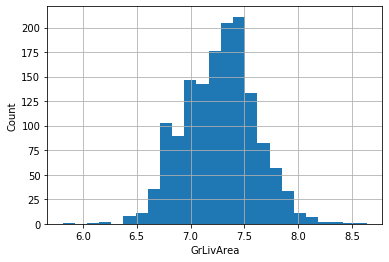

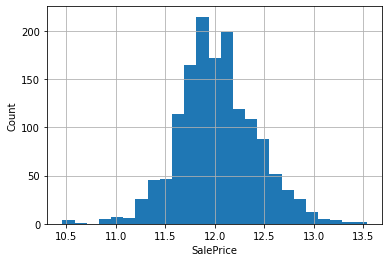

In [20]:
#We do this because we need these features to be normally distributed before they looked skewed.
for feature in num_features:
    df = dataset.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [21]:
import scipy.stats as stats

In [24]:
for feature in num_features:
    print(stats.jarque_bera(dataset[feature]))

(963.0616997754488, 0.0)
(1344.5042026226981, 0.0)
(2.821567823318567, 0.24395197138279823)
(4.697409263480905, 0.09549278044950582)
(42.76727358325149, 5.166596039885007e-10)


In [25]:
catvar = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

In [26]:
catvar

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
for feature in catvar:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [29]:
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,6.

In [37]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [42]:
from sklearn.preprocessing import MinMaxScaler as scaler

In [49]:
scaler.fit(dataset[scaling_feature])

AttributeError: 'DataFrame' object has no attribute '_reset'